In [83]:
#Importing necessary libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#Importing and loading dataset
data = pd.read_csv('reviews.csv')
data.head()

,review_text,label
0,"Works exactly as described, no complaints. Bee...",genuine
1,Don't waste your money. It's a complete scam. ...,fake
2,Too generic and glowing—obvious plant!,fake
3,Product arrived slightly damaged but still usa...,genuine
4,"Does exactly what it claims, fantastic purchase!",genuine


In [85]:
#Defining features(X) and targets(y)
X = data['review_text']
y = data['label']

In [86]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y, shuffle=True)

In [87]:
#Initializing vectorizer and vectorizing training data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [88]:
#Initializing logistic regression model
model = LogisticRegression()
model.fit(X_train_vec,y_train)

LogisticRegression()

In [89]:
#Getting predictions from the model
y_pred = model.predict(X_test_vec)

In [90]:
#Evaluating the model from y_test and y_pred

accuracy = accuracy_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)

In [91]:
print(f"Accuracy Score of the model: {accuracy:.2f}")
print(f"classification Report of the model: {class_rep}")

Accuracy Score of the model: 1.00
classification Report of the model:               precision    recall  f1-score   support

        fake       1.00      1.00      1.00       500
     genuine       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



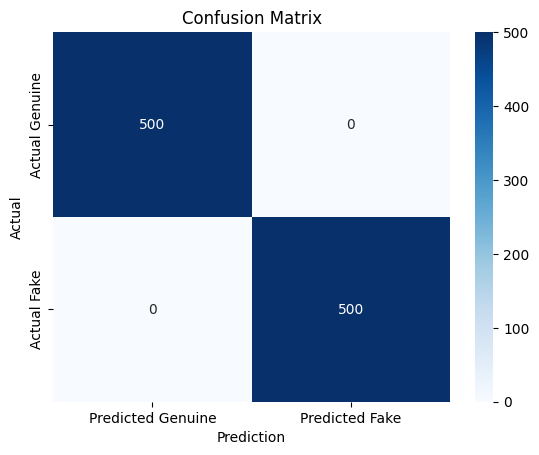

In [92]:
#Confusion Matrix
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Genuine', 'Predicted Fake'],
            yticklabels=['Actual Genuine', 'Actual Fake'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [93]:
user_input = input("Enter your email 📧:\n")

vectorize_user_input = vectorizer.transform([user_input])

prediction = model.predict(vectorize_user_input)

output = "FAKE ❌" if prediction[0] == 'fake' else "Geniune ✅"
print(f"User commented review:\n{user_input}\n")
print(f"The review is classified as:\n{output}")

User commented review:
I'm not sure why so many people like it. It's very disappointing.

The review is classified as:
FAKE ❌
